In [2]:
## load the libraries 
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

### read dataset 
train = pd.read_csv("data/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

## normalize and reshape the predictors  
train_x = train_x / 255

## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

model.summary()

In [6]:
shared_percent = 75 / 100
shared_train_data_size = int(len(train_x) * shared_percent)
num_models = 2

shared_train_data = train_x[:shared_train_data_size]
shared_train_labels = val_x[:shared_train_data_size]
private_train_data = np.split(train_x[shared_train_data_size:], num_models)
private_train_labels = np.split(
    val_x[shared_train_data_size:], num_models)

In [15]:
model_train_data = np.vstack((shared_train_data, private_train_data[0]))
model_train_labels = np.vstack(
    (shared_train_labels, private_train_labels[0]))

model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(model_train_data, model_train_data, epochs=20, batch_size=2048, validation_data=(model_train_labels, model_train_labels), callbacks=[early_stopping])

model_name = "models/clip_1_5_NO_{}_{}_{}.h5".format(0, int(shared_percent * 100), num_models)
model.save(model_name)

Epoch 1/20
21/21 [==============================] - 10s 468ms/step - loss: 0.0246 - val_loss: 0.0175
Epoch 2/20
21/21 [==============================] - 9s 450ms/step - loss: 0.0157 - val_loss: 0.0149
Epoch 3/20
21/21 [==============================] - 11s 516ms/step - loss: 0.0144 - val_loss: 0.0143
Epoch 4/20
21/21 [==============================] - 12s 582ms/step - loss: 0.0139 - val_loss: 0.0141
Epoch 5/20
21/21 [==============================] - 12s 569ms/step - loss: 0.0138 - val_loss: 0.0140
Epoch 6/20
21/21 [==============================] - 11s 533ms/step - loss: 0.0137 - val_loss: 0.0139
Epoch 7/20
21/21 [==============================] - 12s 575ms/step - loss: 0.0136 - val_loss: 0.0139
Epoch 8/20
21/21 [==============================] - 12s 591ms/step - loss: 0.0135 - val_loss: 0.0138
Epoch 9/20
21/21 [==============================] - 12s 586ms/step - loss: 0.0135 - val_loss: 0.0138
Epoch 10/20
21/21 [==============================] - 12s 551ms/step - loss: 0.0135 - val_los

In [16]:
preds = model.predict(val_x)

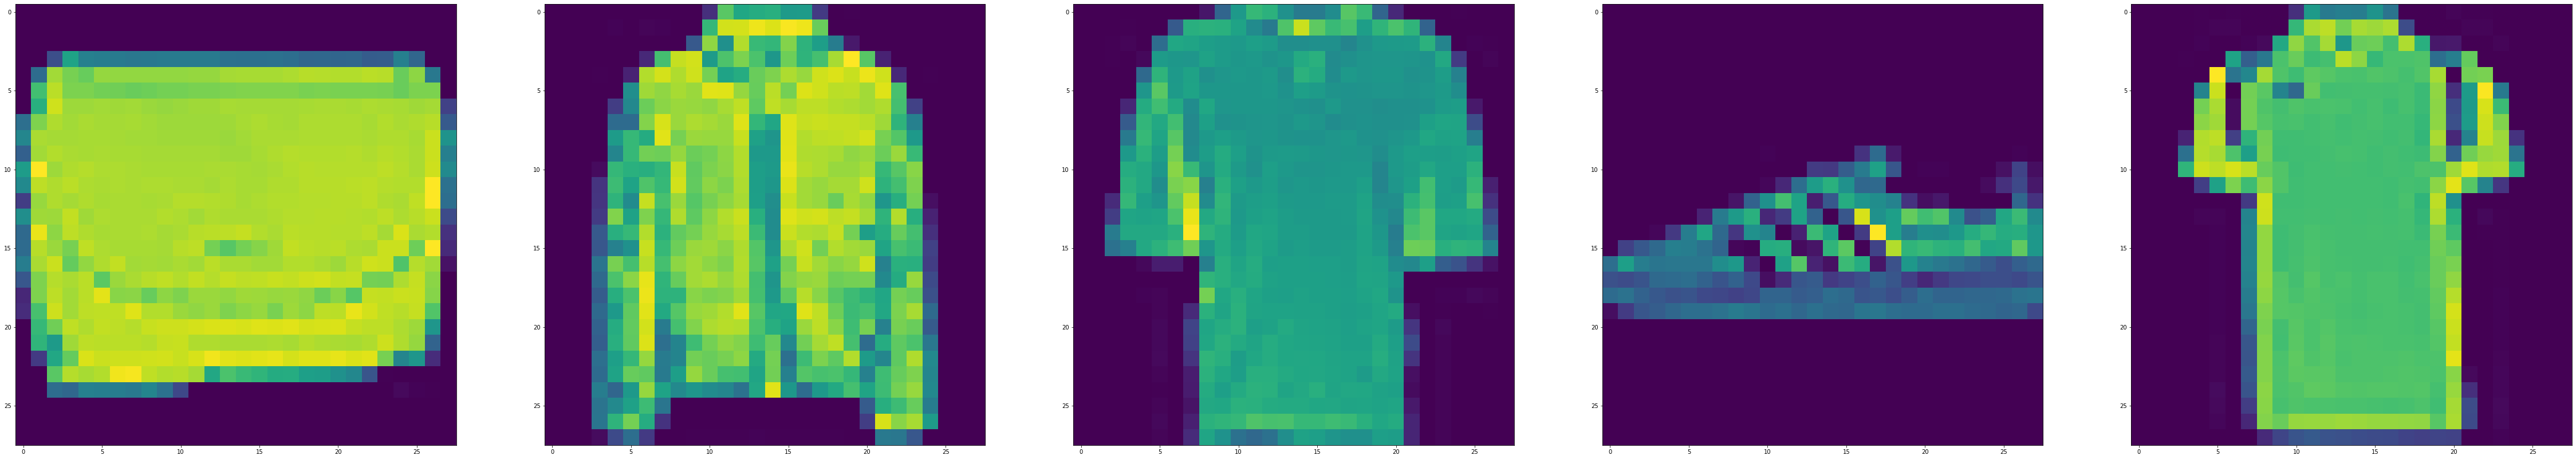

In [17]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

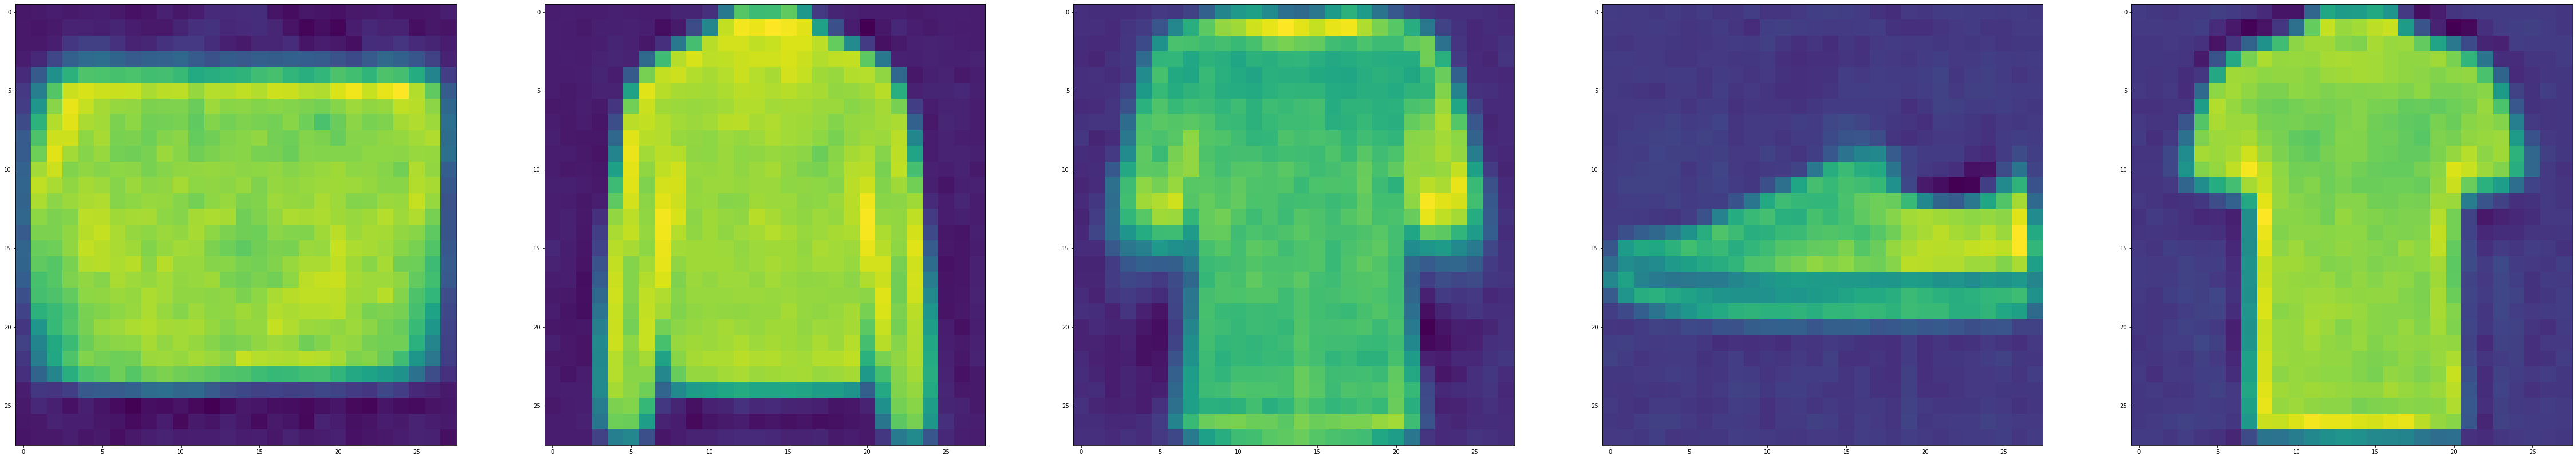

In [18]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

In [19]:
model_train_data = np.vstack((shared_train_data, private_train_data[1]))
model_train_labels = np.vstack(
    (shared_train_labels, private_train_labels[1]))

model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(model_train_data, model_train_data, epochs=20, batch_size=2048, validation_data=(model_train_labels, model_train_labels), callbacks=[early_stopping])

model_name = "models/clip_1_5_NO_{}_{}_{}.h5".format(1, int(shared_percent * 100), num_models)
model.save(model_name)

Epoch 1/20
21/21 [==============================] - 9s 414ms/step - loss: 0.0234 - val_loss: 0.0161
Epoch 2/20
21/21 [==============================] - 9s 443ms/step - loss: 0.0146 - val_loss: 0.0141
Epoch 3/20
21/21 [==============================] - 10s 459ms/step - loss: 0.0134 - val_loss: 0.0136
Epoch 4/20
21/21 [==============================] - 11s 517ms/step - loss: 0.0130 - val_loss: 0.0134
Epoch 5/20
21/21 [==============================] - 11s 514ms/step - loss: 0.0129 - val_loss: 0.0133
Epoch 6/20
21/21 [==============================] - 11s 516ms/step - loss: 0.0128 - val_loss: 0.0132
Epoch 7/20
21/21 [==============================] - 11s 518ms/step - loss: 0.0128 - val_loss: 0.0132
Epoch 8/20
21/21 [==============================] - 11s 522ms/step - loss: 0.0127 - val_loss: 0.0132
Epoch 9/20
21/21 [==============================] - 11s 519ms/step - loss: 0.0127 - val_loss: 0.0131
Epoch 10/20
21/21 [==============================] - 11s 521ms/step - loss: 0.0126 - val_loss

In [12]:
preds = model.predict(val_x)

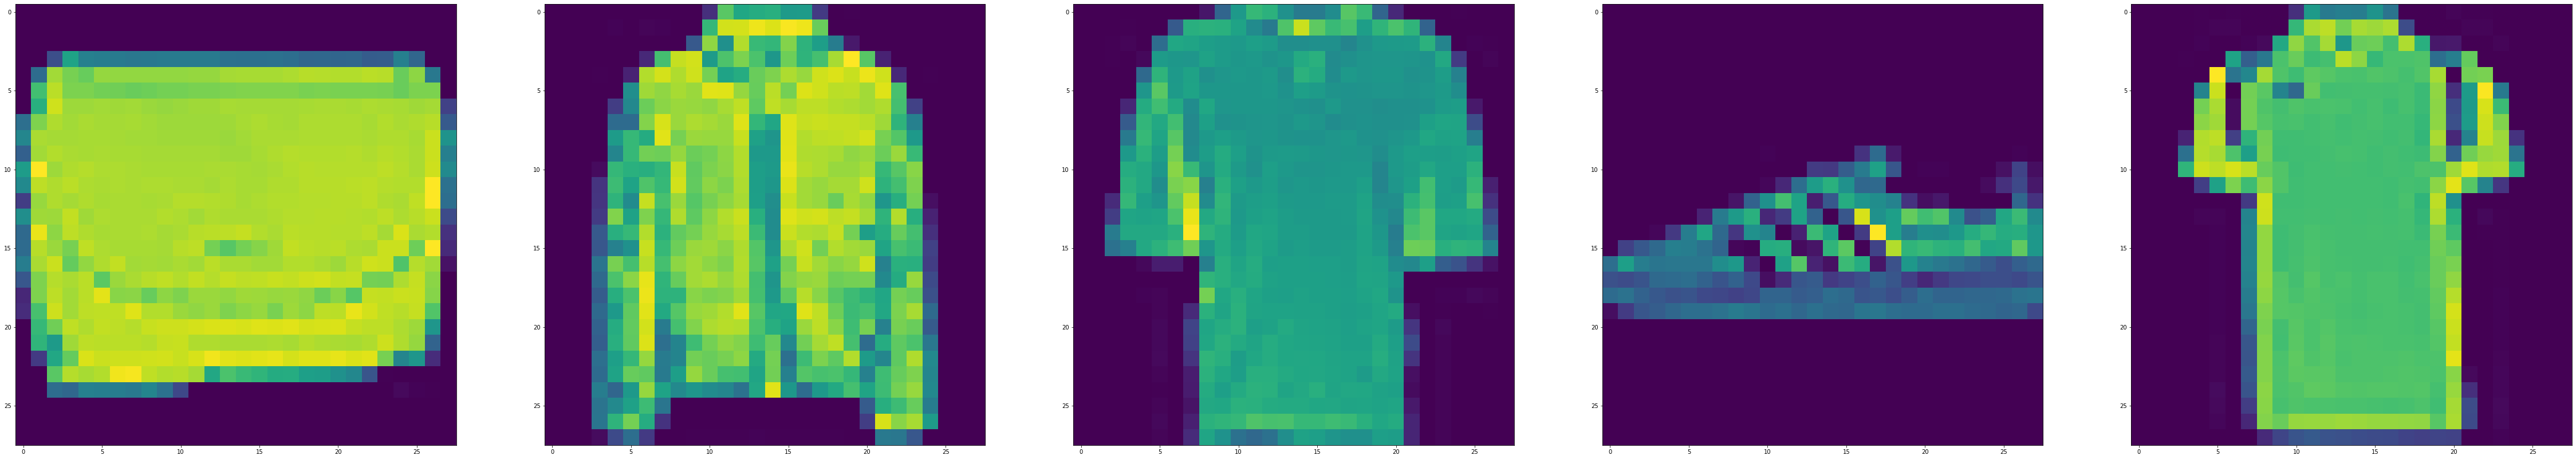

In [13]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

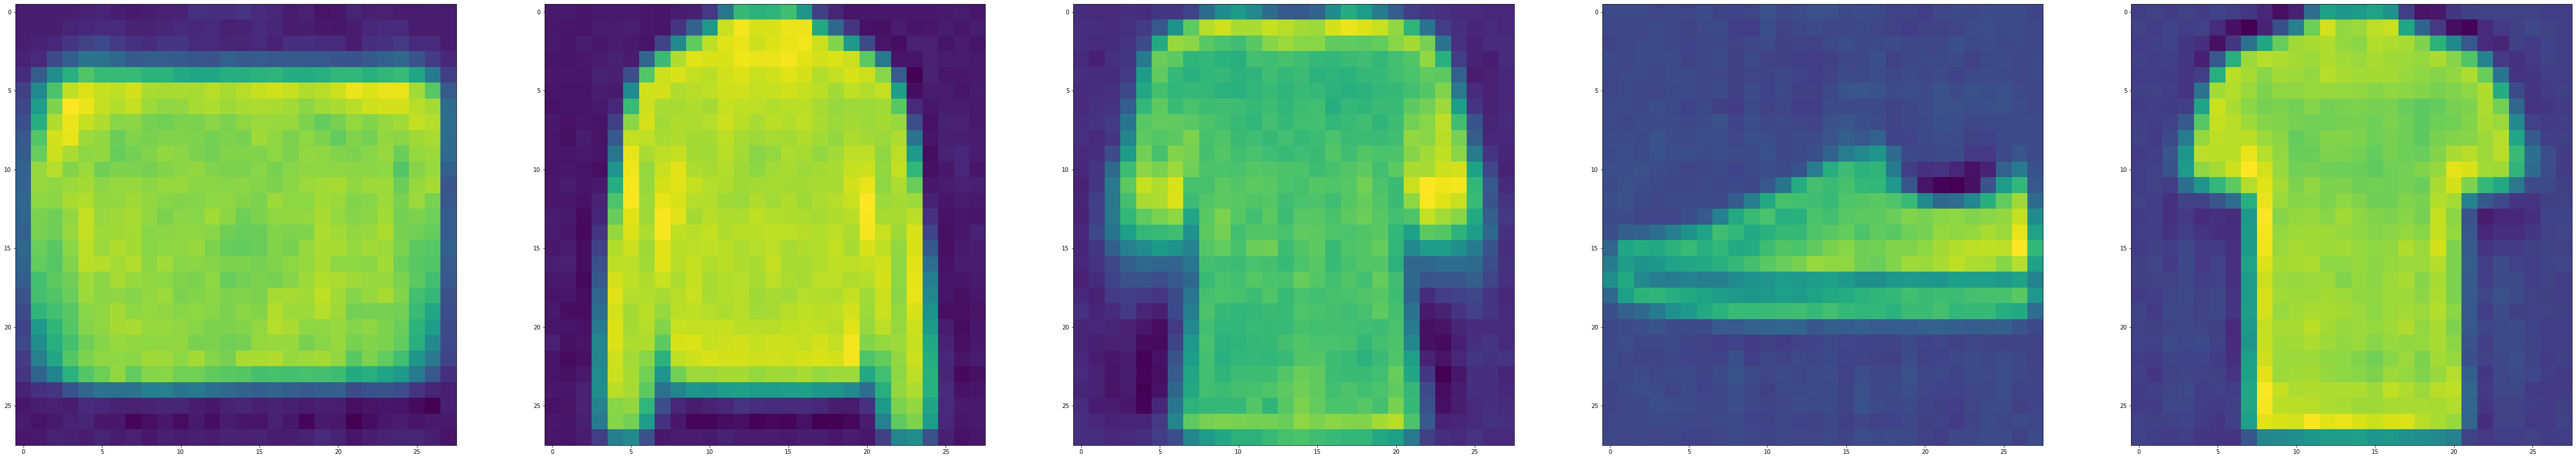

In [14]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()